Pneumonia Detection from X-Ray by images

BHIMAVARAM BHAVANI

# Model Building

### Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,add
from tensorflow.keras.models  import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import os

### Loading the VGG16 mode

In [2]:
# Initializing VGG16 model
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
# include_top = False (loads full model without LAST fully connected layers) 


for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
    
# Flattening out the last layer    
x = Flatten()(vgg.output)


# Adding a dense layer
# To determine if the person is Healthy of Pneumonitic
predictions = Dense(2,activation='softmax')(x) 


model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Data Generator Initialization for trainning the model

In [3]:
# Getting current directory
base_dir = os.getcwd() 

# Defining the input shape
target_shape = (224,224) 

train_dir = base_dir+"\\chest_xray\\train" # 
val_dir = base_dir+"\\chest_xray\\val"     # -- Directories for data
test_dir = base_dir+"\\chest_xray\\test"   # 

#### Loading the VGG16 model with Imagenet weights without the Fully Connected layers

In [4]:
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in vgg.layers:
    layer.trainable = False # Making all the layers non-trainable
    

In [5]:
# Flattening out the last layer

x = Flatten()(vgg.output) 
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [6]:
# Making the data loader for training data
train_gen = ImageDataGenerator(rescale=1/255.0,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2) 


# Making the data loader for validation data
test_gen = ImageDataGenerator(rescale=1/255.0) 


# Function to make iterable object for training
train_data_gen = train_gen.flow_from_directory(train_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

# Function to make iterable object for training
test_data_gen = train_gen.flow_from_directory(test_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Compiling and Training the Model

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit_generator(train_data_gen,
        steps_per_epoch=30,
        epochs=30,
        validation_data=test_data_gen,
        validation_steps=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 20 steps
Epoch 1/30
30/30 [==============================] - 233s 8s/step - loss: 0.1462 - accuracy: 0.9479 - val_loss: 0.6283 - val_accuracy: 0.8594
Epoch 2/30
30/30 [==============================] - 232s 8s/step - loss: 0.1685 - accuracy: 0.9521 - val_loss: 0.9052 - val_accuracy: 0.7781
Epoch 3/30
30/30 [==============================] - 236s 8s/step - loss: 0.1647 - accuracy: 0.9542 - val_loss: 0.3593 - val_accuracy: 0.8969
Epoch 4/30
30/30 [==============================] - 233s 8s/step - loss: 0.2274 - accuracy: 0.9250 - val_loss: 0.3991 - val_accuracy: 0.8813
Epoch 5/30
30/30 [==============================] - 233s 8s/step - loss: 0.1178 - accuracy: 0.9604 - val_loss: 0.6033 - val_accuracy: 0.8813
Epoch 6/30
30/30 [==============================] - 233s 8s/step - loss: 0.1679 - accuracy: 0.9521 - val_loss: 1.8353 - val_accuracy: 0.7188
Epoch 7/30
30/30 [==============================] - 233s 8s/st

### Plotting the Accuracy and Loss curves

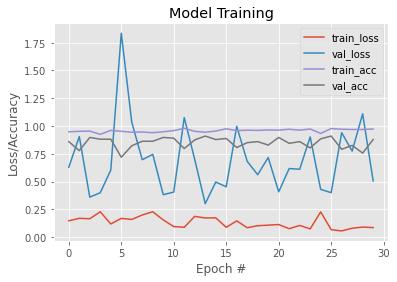

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot(hist.history["accuracy"], label="train_acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("epochs.png")

### Saving the Model

In [15]:
model.save('model.h5')